### Generating a 2D dataset with linearly separated labels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Numpy's [random_sample](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.random_sample.html) method returns an array of random numbers between 0-1, in order to generate random numbers between some *min* and *max* they have to be scaled (multiplied by *max* - *min*) and shifted (add *min*).

In [2]:
sample_count=4
sample_min=10
sample_max=20

random_sample = np.random.random_sample(sample_count)
print('samples returned by numpy:\n{}\n'.format(random_sample))
sample_scale = sample_max-sample_min
adjusted_sample=(sample_scale*random_sample)+sample_min
print('sample adjusted to have min {} and max {}:\n{}\n'.format(sample_min, sample_max, adjusted_sample))

samples returned by numpy:
[0.00127201 0.43079996 0.55842521 0.05285814]

sample adjusted to have min 10 and max 20:
[10.01272006 14.30799959 15.58425213 10.52858143]



While any two points can define a line, choosing the intercepts is generally the easiest way to derive the formula. Using the slope intercept form, y=mx+b, b equals the y-intercept and m equals negative y-intercept over x-intercept.

line with the formula y = -2.25x + 9


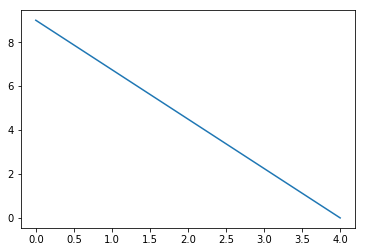

In [3]:
x_intercept=4
y_intercept=9
slope = (-1*y_intercept)/x_intercept
print('line with the formula y = {}x + {}'.format(slope, y_intercept))
plt.plot([x_intercept, 0], [0, y_intercept])
plt.show()

Linearly separable means that points to one side of the line are in one category, and points on the other side are in a different category (they can be in one category or the other if on the line, these special cases must be defined). Inequalities (<, >) are used in place of an equal sign in the formula to test the relationship.

point (1, 4) is below the line


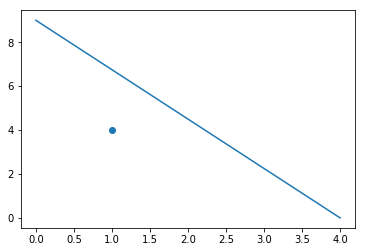

In [4]:
test_x = 1
test_y = 4

if test_y > slope*test_x + y_intercept:
    print('point ({}, {}) is above the line'.format(test_x, test_y))
else:
    print('point ({}, {}) is below the line'.format(test_x, test_y))
plt.plot([x_intercept, 0], [0, y_intercept])
plt.scatter(test_x, test_y)
plt.show()

Now we bring it all together to generate an array of random coordinates, and categorize them based on their relationship to a line: zero if the point is below the line, one if above the line.

In [5]:
sample_count=50
x_min=0
x_max=10
y_min=25
y_max=100
x_intercept=15
y_intercept=80

random_sample_x = np.random.random_sample(sample_count)
adjusted_sample_x=((x_max-x_min)*random_sample_x)+x_min
random_sample_y = np.random.random_sample(sample_count)
adjusted_sample_y=((y_max-y_min)*random_sample_y)+y_min
slope=(-1*y_intercept)/x_intercept

label_array=np.empty(sample_count)

for i, (x, y) in enumerate(zip(adjusted_sample_x, adjusted_sample_y)):
    if y > slope*x + y_intercept:
        label_array[i]=0
    else:
        label_array[i]=1

Now to plot our results to make sure everything seems sensible (N.B. - I'm using the minimum x and y values to plot the line rather than intercepts to prevent odd auto-scaling when using minimum values far from zero).

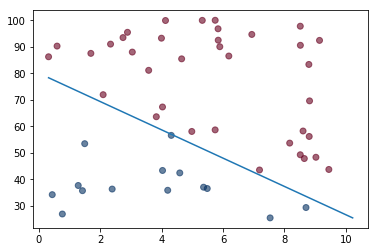

In [6]:
x1 = min(adjusted_sample_x)
y1 = slope*x1 + y_intercept
y2 = min(adjusted_sample_y)
x2 = (y2 - y_intercept)/slope

plt.scatter(adjusted_sample_x, adjusted_sample_y, c=label_array, cmap=cm.RdBu, alpha=0.6)
plt.plot([x1, x2], [y1, y2])
plt.show()

Finally we'll turn this into a function to be used in other tutorials. For this, I'm creating a 2d array rather than two different arrays for x and y.

In [7]:
def generate_line_separated_dataset(sample_count, x_intercept, y_intercept, x_min=0, x_max=10, y_min=0, y_max=10):
    label_array=np.empty(sample_count)
    coord_array = np.empty((sample_count, 2))
    coord_array[:,0]=((x_max-x_min)*np.random.random_sample(sample_count))+x_min
    coord_array[:,1]=((y_max-y_min)*np.random.random_sample(sample_count))+y_min
    slope=(-1*y_intercept)/x_intercept
    for i, coord_pair in enumerate(coord_array):
        if coord_pair[1] > slope*coord_pair[0] + y_intercept:
            label_array[i]=0
        else:
            label_array[i]=1
    return coord_array, label_array

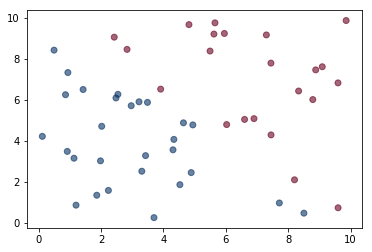

In [8]:
coord_array, label_array = generate_line_separated_dataset(50, 10, 10)
plt.scatter(coord_array[:,0], coord_array[:,1], c=label_array, cmap=cm.RdBu, alpha=0.6)
plt.show()